### Code to generate a sequenceof samples, based on one hot encoding using recurrent neural networks

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def parseMatrixFromFile(fname):
    with open(fname) as f:
        for l in f:
            print(l)
            yield [int(x) for x in l.strip().split()]

In [3]:
rhythm_data_ = list(parseMatrixFromFile("mus_dataset_3.txt"))

115 89 88 66 105 94 101 87 80 79 91 112 107 114 96 88 102 114 106 106 106 88 105 97 107 95 106 97 107 87 86 117 114 107 108 111 119 117 91 107 82 81 103 105 116 105 119 121 109 115 120 110 88 100 106 88 92 92 85 79 95 112 92 104 99 110 111 97 98 107 94 97 88 110 90 82 90 109 105 106 116 113 117 115 112 113 121 91 109 113 116 113 112 111 117 120 102 91 118 105 86 89 104 115 105 125 121 119 109 116 103 93 127 114 10 108 98 113 106 109 105 100 99 90 107 121 103 125 114 118 99 105 98 112 109 102 99 91 86 79 96 110 104 117 97 99 99 88 117 102 110 89 90 101 122 109 100 119 88 119 107 108 107 106 104 118 116 117 108 106 91 93 81 83 82 106 93 111 85 116 105 112 104 109 100 107 117 98 81 120 118 112 115 122 111 99 110 113 101 117 101 116 103 95 97 77 90 96 116 110 110 121 121 114 98 106 85 106 106 85 83


In [4]:
rhythm_data_ = rhythm_data_[0]

In [5]:
len(rhythm_data_)

221

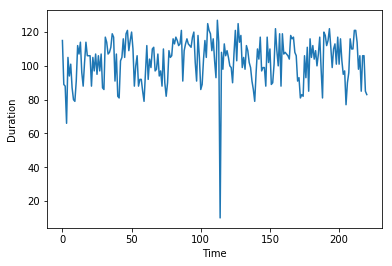

In [6]:
x = [i for (i,x) in enumerate(rhythm_data_)]

plt.plot(x,rhythm_data_)
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()

In [7]:
memory = 10

In [8]:
rhythm_data = []
ini = 0
end = ini + memory
while end < len(rhythm_data_):
    #print(rhythm_data_[ini:end])
    rhythm_data.append(rhythm_data_[ini:end])
    ini = ini + 1
    end = end + 1

In [9]:
rhythm_data

[[115, 89, 88, 66, 105, 94, 101, 87, 80, 79],
 [89, 88, 66, 105, 94, 101, 87, 80, 79, 91],
 [88, 66, 105, 94, 101, 87, 80, 79, 91, 112],
 [66, 105, 94, 101, 87, 80, 79, 91, 112, 107],
 [105, 94, 101, 87, 80, 79, 91, 112, 107, 114],
 [94, 101, 87, 80, 79, 91, 112, 107, 114, 96],
 [101, 87, 80, 79, 91, 112, 107, 114, 96, 88],
 [87, 80, 79, 91, 112, 107, 114, 96, 88, 102],
 [80, 79, 91, 112, 107, 114, 96, 88, 102, 114],
 [79, 91, 112, 107, 114, 96, 88, 102, 114, 106],
 [91, 112, 107, 114, 96, 88, 102, 114, 106, 106],
 [112, 107, 114, 96, 88, 102, 114, 106, 106, 106],
 [107, 114, 96, 88, 102, 114, 106, 106, 106, 88],
 [114, 96, 88, 102, 114, 106, 106, 106, 88, 105],
 [96, 88, 102, 114, 106, 106, 106, 88, 105, 97],
 [88, 102, 114, 106, 106, 106, 88, 105, 97, 107],
 [102, 114, 106, 106, 106, 88, 105, 97, 107, 95],
 [114, 106, 106, 106, 88, 105, 97, 107, 95, 106],
 [106, 106, 106, 88, 105, 97, 107, 95, 106, 97],
 [106, 106, 88, 105, 97, 107, 95, 106, 97, 107],
 [106, 88, 105, 97, 107, 95, 106

In [10]:
data_y = [e[memory-1] for e in rhythm_data]

In [11]:
data_X = [e[:-1] for e in rhythm_data]

In [12]:
print(data_X[0])
print(data_y[0])
print(rhythm_data[0])

[115, 89, 88, 66, 105, 94, 101, 87, 80]
79
[115, 89, 88, 66, 105, 94, 101, 87, 80, 79]


In [13]:
# reshape X to be [samples, time_steps, features]
X = np.reshape(data_X, (len(data_X), len(data_X[0]), 1))

# one hot encode the output variable
y = np_utils.to_categorical(data_y)
#y = data_y

In [16]:
print(y[0])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [17]:
print(np.shape(X))
print(np.shape(y))

(211, 9, 1)
(211, 128)


In [18]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [20]:
with tf.device('/gpu:0'):
    #model.fit(X, y, epochs=500, batch_size=128, callbacks=callbacks_list)
    model.fit(X, y, epochs=500, batch_size=32)

Epoch 1/500
211/211 [==============================] - 4s - loss: 4.6105     
Epoch 2/500
211/211 [==============================] - 2s - loss: 4.0881     
Epoch 3/500
211/211 [==============================] - 3s - loss: 3.8787     
Epoch 4/500
211/211 [==============================] - 2s - loss: 3.7895     
Epoch 5/500
211/211 [==============================] - 3s - loss: 3.7823     
Epoch 6/500
211/211 [==============================] - 2s - loss: 3.7479     
Epoch 7/500
211/211 [==============================] - 2s - loss: 3.7546     
Epoch 8/500
211/211 [==============================] - 3s - loss: 3.7205     
Epoch 9/500
211/211 [==============================] - 3s - loss: 3.7571     
Epoch 10/500
211/211 [==============================] - 3s - loss: 3.7400     
Epoch 11/500
211/211 [==============================] - 3s - loss: 3.6968     
Epoch 12/500
211/211 [==============================] - 2s - loss: 3.6942     
Epoch 13/500
211/211 [==============================] - 3s - 

211/211 [==============================] - 3s - loss: 0.0371     
Epoch 207/500
211/211 [==============================] - 3s - loss: 0.0354     
Epoch 208/500
211/211 [==============================] - 3s - loss: 0.0400     
Epoch 209/500
211/211 [==============================] - 3s - loss: 0.0388     
Epoch 210/500
211/211 [==============================] - 3s - loss: 0.0359     
Epoch 211/500
211/211 [==============================] - 3s - loss: 0.0338     
Epoch 212/500
211/211 [==============================] - 2s - loss: 0.0344     
Epoch 213/500
211/211 [==============================] - 3s - loss: 0.0365     
Epoch 214/500
211/211 [==============================] - 3s - loss: 0.0328     
Epoch 215/500
211/211 [==============================] - 3s - loss: 0.0387     
Epoch 216/500
211/211 [==============================] - 3s - loss: 0.0298     
Epoch 217/500
211/211 [==============================] - 3s - loss: 0.0306     
Epoch 218/500
211/211 [==============================]

211/211 [==============================] - 3s - loss: 0.0054     
Epoch 411/500
211/211 [==============================] - 2s - loss: 0.0052     
Epoch 412/500
211/211 [==============================] - 2s - loss: 0.0053     
Epoch 413/500
211/211 [==============================] - 3s - loss: 0.0053     
Epoch 414/500
211/211 [==============================] - 3s - loss: 0.0049     
Epoch 415/500
211/211 [==============================] - 3s - loss: 0.0050     
Epoch 416/500
211/211 [==============================] - 3s - loss: 0.0051     
Epoch 417/500
211/211 [==============================] - 3s - loss: 0.0053     
Epoch 418/500
211/211 [==============================] - 3s - loss: 0.0048     
Epoch 419/500
211/211 [==============================] - 2s - loss: 0.0062     
Epoch 420/500
211/211 [==============================] - 3s - loss: 0.0041     
Epoch 421/500
211/211 [==============================] - 3s - loss: 0.0055     
Epoch 422/500
211/211 [==============================]

In [21]:
generated_rhythm = []
# Should be a multiple of len(rhythm_data[0])
num_samples = len(rhythm_data_)

start = np.random.randint(0, len(data_X)-1)
pattern = data_X[start]
print("Seed:")
print(pattern)

# generate sequence with a random seed
for i in range(num_samples):
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    
    generated_rhythm.append(index)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("Generation Completed!")

Seed:
[113, 121, 91, 109, 113, 116, 113, 112, 111]
Generation Completed!


In [22]:
len(generated_rhythm)

221

In [23]:
print(generated_rhythm)

[117, 120, 102, 91, 118, 105, 86, 89, 104, 115, 105, 125, 121, 119, 109, 116, 103, 93, 127, 114, 10, 108, 98, 113, 106, 109, 105, 100, 99, 90, 107, 121, 103, 125, 114, 118, 99, 105, 98, 112, 109, 102, 99, 91, 86, 79, 96, 110, 104, 117, 97, 99, 99, 88, 117, 102, 110, 89, 90, 101, 122, 109, 100, 119, 88, 119, 107, 108, 107, 106, 104, 118, 116, 117, 108, 106, 91, 93, 81, 83, 82, 106, 93, 111, 85, 116, 105, 112, 104, 109, 100, 107, 117, 98, 81, 120, 118, 112, 115, 122, 111, 99, 110, 113, 101, 117, 101, 116, 103, 95, 97, 77, 90, 96, 116, 110, 110, 121, 121, 114, 98, 106, 85, 106, 106, 85, 110, 90, 86, 79, 95, 109, 105, 104, 99, 99, 110, 88, 107, 95, 110, 87, 86, 117, 114, 107, 108, 111, 119, 117, 91, 107, 82, 81, 103, 105, 116, 105, 119, 121, 109, 115, 120, 110, 88, 100, 106, 88, 92, 92, 85, 79, 95, 112, 92, 104, 99, 110, 111, 97, 98, 107, 94, 97, 88, 110, 90, 82, 90, 109, 105, 106, 116, 113, 117, 115, 112, 113, 121, 91, 109, 113, 116, 113, 112, 111, 117, 120, 102, 91, 118, 105, 86, 89, 104

In [ ]:
def write_to_file(filename, arg_list):
    file = open(filename, 'w')
    for item in arg_list:
        file.write(str(item)+" ")
    file.close()
    print("Output dumped to file ",filename)

In [ ]:
write_to_file("mus_dataset_3_output.txt",generated_rhythm)

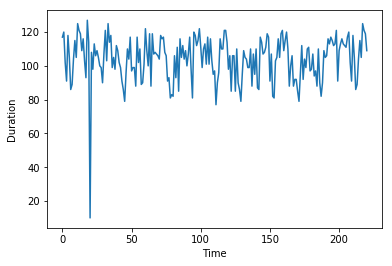

In [24]:
x = [i for (i,x) in enumerate(generated_rhythm)]

plt.plot(x,generated_rhythm)
plt.xlabel("Time")
plt.ylabel("Duration")
plt.show()